In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

%config InlineBackend.figure_format = "retina"

In [2]:
MM2M = 1e-3
KM2M = 1e3
Y2S = 365.25 * 24 * 3600
MIN_GEOMETRIC_MOMENT = 1e-10
depth = 15e3
years = 100
reference_slip_deficit_rate = 30 * MM2M / Y2S  # mm/yr
n_pts = 1000
x = np.linspace(0, depth, n_pts)
segment_area = x[1] - x[0]

coseismic_slip_magnitude = 5.0
coseismic_slip = coseismic_slip_magnitude * np.cos(x / depth * np.pi / 2.0) ** 3.0
slip_deficit_rate = reference_slip_deficit_rate * np.cos(x / depth * np.pi / 2.0)
accumulated_geometric_moment = slip_deficit_rate * years * Y2S * segment_area
coseismic_geometric_moment = coseismic_slip * segment_area
residual_geometric_moment_all = accumulated_geometric_moment - coseismic_geometric_moment
residual_geometric_moment = residual_geometric_moment_all.copy()
residual_geometric_moment[residual_geometric_moment <= 0] = MIN_GEOMETRIC_MOMENT


In [157]:
def plot_geometric_moments_and_afterslip_velocities():
    # Geometric moments
    plt.figure(figsize=(10, 4.5))
    plt.subplot(1, 2, 1)

    fill_y = np.array([x, np.flip(x)]).flatten()
    fill_x = np.array([accumulated_geometric_moment / segment_area, np.zeros(n_pts)]).flatten()
    plt.fill(
            fill_x,
            fill_y / 1e3,
            color="cyan",
            label="accumulated", edgecolor=None,
        )

    fill_y = np.array([x, np.flip(x)]).flatten()
    fill_x = np.array([-coseismic_geometric_moment / segment_area, np.zeros(n_pts)]).flatten()
    plt.fill(
            fill_x,
            fill_y / 1e3,
            color="orange",
            label="coseismic", edgecolor=None,
        )

    fill_y = np.array([x, np.flip(x)]).flatten()
    fill_x = np.array([residual_geometric_moment_all / segment_area, np.zeros(n_pts)]).flatten()
    plt.fill(
            fill_x,
            fill_y / 1e3,
            color="black",
            label="residual", alpha=0.25, edgecolor=None,
        )
    

    fill_y = np.array([x, np.flip(x)]).flatten()
    fill_x = np.array([-m_afterslip_corrected, np.zeros(n_pts)]).flatten()
    plt.fill(
            fill_x,
            fill_y / 1e3,
            color="red",
            label="afterslip", alpha=0.5, edgecolor=None,
        )

    # plt.plot(accumulated_geometric_moment / segment_area, x / KM2M, "-k", linewidth=0.5)
    # plt.plot(-coseismic_geometric_moment / segment_area, x / KM2M, "-k", linewidth=0.5)
    # plt.plot(residual_geometric_moment_all / segment_area, x / KM2M, "-k", linewidth=0.5)
    # plt.plot(-m_afterslip_corrected / segment_area, x / KM2M, "-k", linewidth=0.5)
    plt.plot(m_end_of_event, x / KM2M, "-k", color="k", linewidth=1.0, label="end of sequence")

    # plt.plot([0, 0], [0, 15], "-k", linewidth=0.5)

    plt.xlim(-5, 5)
    plt.ylim([0, 15])
    plt.yticks([0, 5, 10, 15])
    plt.gca().invert_yaxis()
    plt.xlabel("$m_i \; / \; a_i$ (m)")
    plt.ylabel("$d$ (km)")
    plt.legend(loc="lower left", frameon=False)

    # After-slip velocities
    plt.subplot(1, 2, 2)
    colors = plt.get_cmap("plasma_r")(np.linspace(0.0, 1.0, len(t)))
    for i in range(len(t)):
        plt.plot(v[:, i], x / 1e3, "-k", linewidth=0.5)
        fill_y = np.array([x, np.flip(x)]).flatten()
        fill_x = np.array([v[:, i], np.zeros(n_pts)]).flatten()
        plt.fill(
            fill_x,
            fill_y / 1e3,
            color=colors[i, 0:3],
            label="t = {:.2f} years".format(t[i] / Y2S),
        )
    plt.xlabel("$v$ (m / yr)")
    plt.ylabel("$d$ (km)")
    # plt.xlim([, ])
    plt.yticks([0, 5, 10, 15])
    plt.ylim([0, 15])
    plt.gca().set_xlim(left=0.0)
    plt.gca().invert_yaxis()
    plt.legend(frameon = False)
    plt.savefig("kinematic_afterslip_m_velocities.pdf")
    plt.savefig("kinematic_afterslip_m_velocities.png", dpi=500)
    plt.show()


In [158]:
def calc_V(c, gamma, m_coseismic, g, h, f):
    numerator = c ** 2 * gamma * m_coseismic
    denominator = np.sum(g * h / f)
    V = numerator / denominator
    return V

def calc_v0(V, g, h):
    v0 = V * g * h
    return v0

def calc_m_afterslip(gamma, m_coseismic, g, h, f):
    numerator = gamma * g * h * m_coseismic
    denominator = f * np.sum(g * h / f)
    m_afterslip = numerator / denominator
    return m_afterslip

/var/folders/pq/qqjshcd51vg5t9w5ws8wkmw00000gn/T/ipykernel_8552/2484203206.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(m_end_of_event, x / KM2M, "-k", color="k", linewidth=1.0, label="end of sequence")


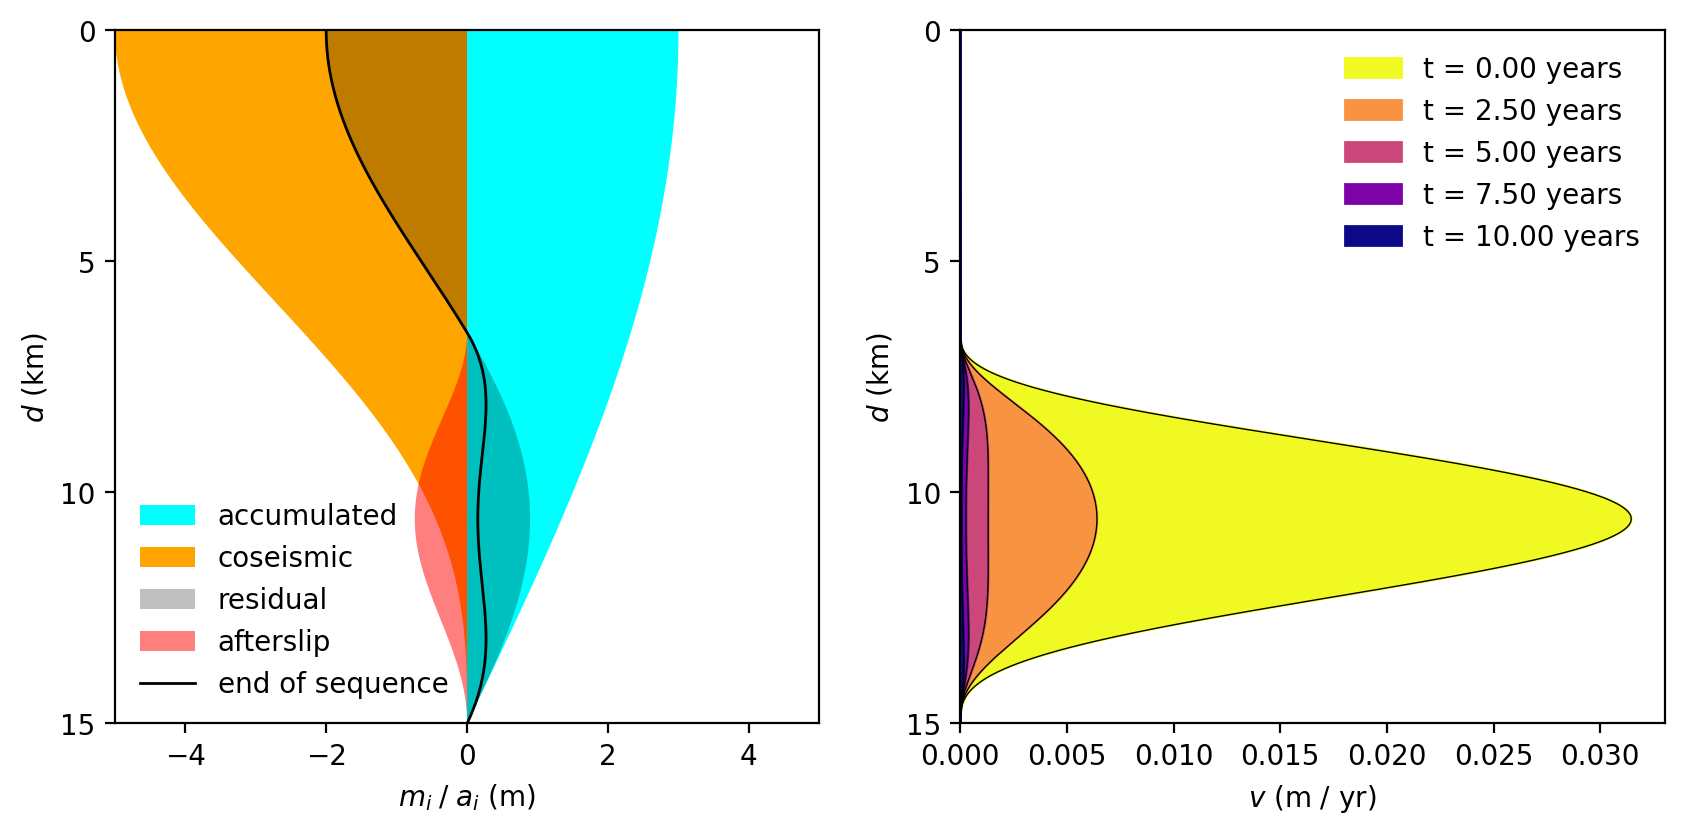

np.sum(m_afterslip)=212.24438419842085
np.sum(m_afterslip_corrected)=212.24438419842085
np.sum(m_afterslip_numerical)=242.1900879249732
np.sum(m_afterslip_numerical) / np.sum(m_afterslip_corrected)=1.1410906763900854
np.sum(m_afterslip_corrected) / np.sum(m_afterslip_numerical)=0.8763545445516785
np.sum(coseismic_slip)=2122.443841984208


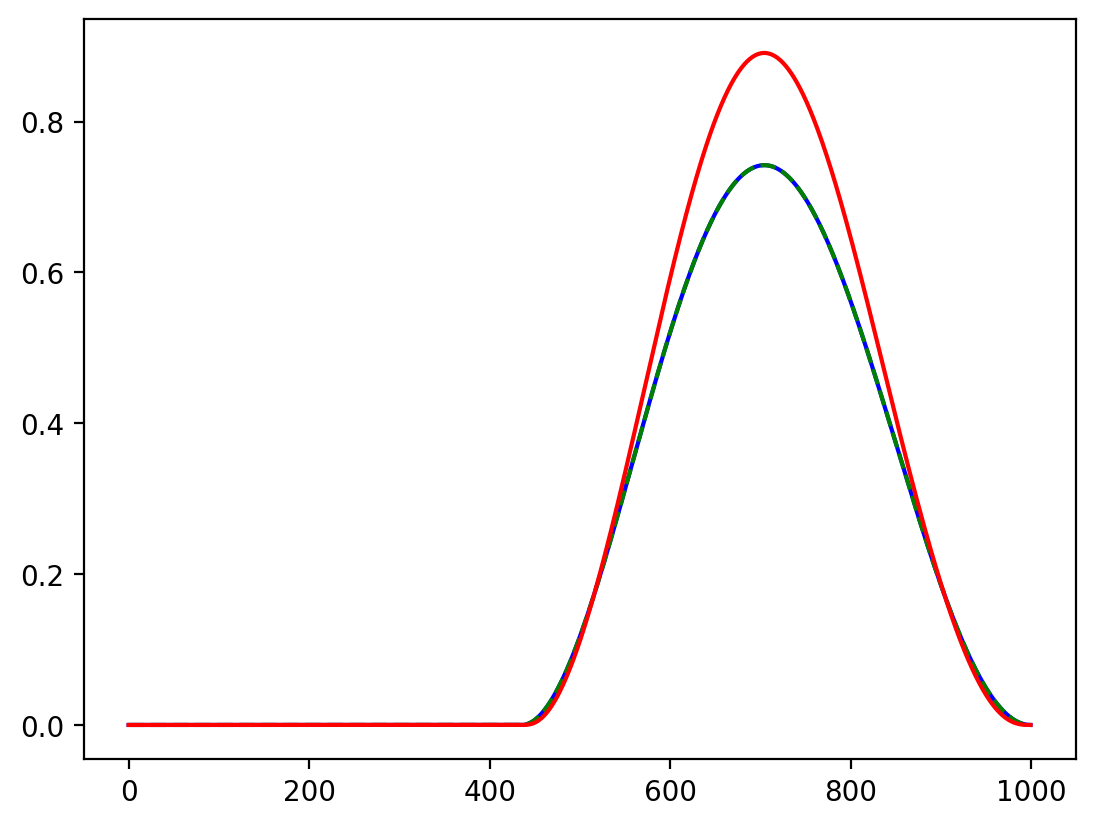

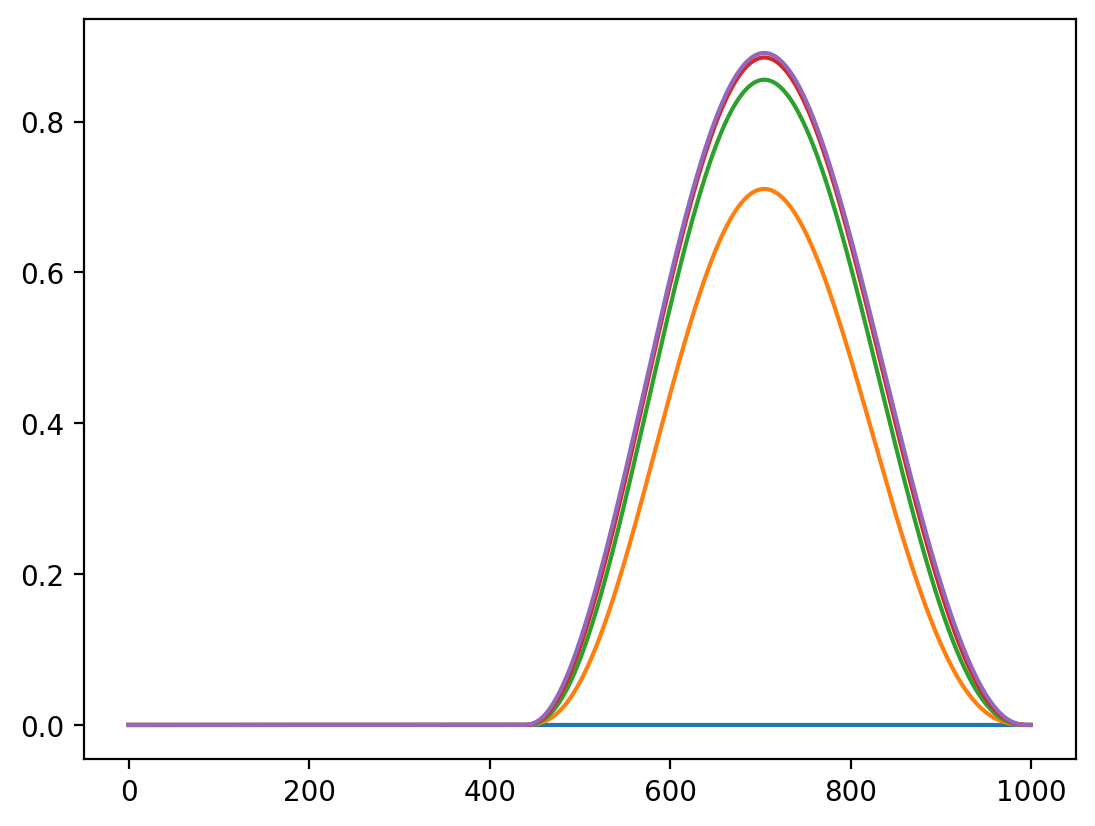

In [159]:
# Basics
gamma = 0.1
c = 0.00001
m_coseismic = np.sum(coseismic_geometric_moment / segment_area)

# Core function choices
f = residual_geometric_moment
g = residual_geometric_moment ** 3.0
h = m_coseismic

# Initial conditions
V = calc_V(c, gamma, m_coseismic, g, h, f)
v0 = calc_v0(V, g, h)

# Time to evaluate
t = np.linspace(0, 10, 5) * Y2S
# t = np.logspace(-24, 3, 100) * Y2S

# Calculate afterslip velocities at specified times
v = np.zeros((n_pts, len(t)))
for i in range(len(t)):
    v[:, i] = v0 * np.exp(-(c**2.0) * f * segment_area * t[i])
v = v * Y2S # Convert from m/s to m/yr

# Analytic geometric moment
m_afterslip = calc_m_afterslip(gamma, m_coseismic, g, h, f)
m_afterslip_corrected = np.zeros(n_pts)

# Analytic fterslip correction for non-negative areas
non_zero_segments = np.where(residual_geometric_moment > MIN_GEOMETRIC_MOMENT)[0]
m_afterslip_corrected[non_zero_segments] = np.sum(m_afterslip) / len(non_zero_segments) 
m_afterslip_corrected = m_afterslip

# Geometric moment left at the end of the event and afterslip sequence
m_end_of_event = residual_geometric_moment_all / segment_area - m_afterslip

# Plot geometric moments and afterslip velocities
plot_geometric_moments_and_afterslip_velocities()

# Numerical integration of velocities for afterslip moment
m_afterslip_numerical = np.trapz(v, x=t / Y2S * segment_area, axis=1)

# DEBUG: Print scalar afterslip moment estimates
print(f"{np.sum(m_afterslip)=}")
print(f"{np.sum(m_afterslip_corrected)=}")
print(f"{np.sum(m_afterslip_numerical)=}")
print(f"{np.sum(m_afterslip_numerical) / np.sum(m_afterslip_corrected)=}")
print(f"{np.sum(m_afterslip_corrected) / np.sum(m_afterslip_numerical)=}")
print(f"{np.sum(coseismic_slip)=}")

# DEBUG: Plot afterslip distributions
plt.figure()
plt.plot(m_afterslip, "-b")
plt.plot(m_afterslip_corrected, "--g")
plt.plot(m_afterslip_numerical, "-r")
plt.show()

# DEBUG: Plot cumulative slip
# slip = np.cumtrapz(v, axis=1)
slip = integrate.cumtrapz(v, x=t/Y2S, initial=0, axis=1)
plt.figure()
plt.plot(slip * segment_area)
plt.show()